# Taller: Espaciotiempo de Schwarzschild

En este notebook, exploraremos la solución de Schwarzschild.

1. Definiremos la métrica de Schwarzschild usando `sympy`.
2. Calcularemos los símbolos de Christoffel.
3. Resolveremos la ecuación geodésica en este espaciotiempo.
4. Visualizaremos las trayectorias de partículas con masa.

Utilizaremos las siguientes librerías de Python:
- `sympy` para cálculos simbólicos,
- `scipy` y `numpy` para integración numérica,
- `matplotlib` para visualización,
- `einsteinpy` para cálculos más especializados en RG (al final).

-------------
## Preparación

### Cargar librerías

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, Matrix, simplify, sin, cos
from scipy.integrate import solve_ivp
sp.init_printing()

### Definir la métrica de Schwarzschild

In [16]:
# Definir variables simbolicas para sympy
t, r, theta, phi = symbols('t r theta phi')
M = symbols('M', real=True, positive=True)

# definir las componentes de la metrica de  Schwarzschild
g = sp.zeros(4)
g[0,0] = -(1 - 2*M/r)
g[1,1] = 1/(1 - 2*M/r)
g[2,2] = r**2
g[3,3] = r**2 * sp.sin(theta)**2

coords = [t, r, theta, phi]
g

⎡2⋅M                               ⎤
⎢─── - 1      0      0       0     ⎥
⎢ r                                ⎥
⎢                                  ⎥
⎢             1                    ⎥
⎢   0     ─────────  0       0     ⎥
⎢           2⋅M                    ⎥
⎢         - ─── + 1                ⎥
⎢            r                     ⎥
⎢                                  ⎥
⎢                     2            ⎥
⎢   0         0      r       0     ⎥
⎢                                  ⎥
⎢                         2    2   ⎥
⎣   0         0      0   r ⋅sin (θ)⎦


## Ejercicio 1: Calcular los símbolos de Christoffel

Utilizando la métrica de Schwarzschild definida anteriormente, calcular los símbolos de Christoffel:
$$
\Gamma^a_{bc} = \frac{1}{2} g^{ad}(\partial_b g_{dc} + \partial_c g_{db} - \partial_d g_{bc})
$$

Comenzar calculando la métrica inversa y las derivadas.

In [26]:
g_inv = simplify(g.inv())
Gamma = [[[
    simplify(1/2 * sum(g_inv[a,d] * 
        (sp.diff(g[d,c], coords[b]) + sp.diff(g[d,b], coords[c]) - sp.diff(g[b,c], coords[d]))
        for d in range(4)))
    for c in range(4)] for b in range(4)] for a in range(4)]

# Imprimir las componentes
Gamma[1][0][0]  # Γ^r_{tt}

Gamma[1][0][0]


## Ejercicio 2: La ecuación geodésica

La ecuación geodésica es:

$$
\frac{d^2 x^a}{d\tau^2} + \Gamma^a_{bc} \frac{dx^b}{d\tau} \frac{dx^c}{d\tau} = 0
$$

Set up the geodesic equations for motion in the equatorial plane ($\theta = \pi/2$).
Analizar el movimiento geodésico en el plano ecuatorial ($\theta = \pi/2$)

In [18]:
# En el plano ecuatorial, θ = π/2, podemos utilizar sin(θ)=1
subs_dict = {theta: sp.pi/2, sp.sin(theta): 1, sp.cos(theta): 0}
Gamma_simplified = [[[
    Gamma[a][b][c].subs(subs_dict) for c in range(4)] for b in range(4)] for a in range(4)]

# Definir variables y funciones simbólicas x^a(τ)
tau = symbols('tau')
x = [Function(str(c))(tau) for c in coords]
dx = [sp.diff(xi, tau) for xi in x]
ddx = [sp.diff(dxi, tau) for dxi in dx]

# Ecuación geodésica
geodesic_eq = [
    simplify(ddx[a] + sum(Gamma_simplified[a][b][c].subs([(coords[i], x[i]) for i in range(4)]) * dx[b] * dx[c]
    for b in range(4) for c in range(4)))
    for a in range(4)]

geodesic_eq[1]  # ecuación para r(τ)

                            2                         2                ⎛                         2   
                2 ⎛d       ⎞           2    ⎛d       ⎞                 ⎜               ⎛d       ⎞    
- M⋅(2⋅M - r(τ)) ⋅⎜──(t(τ))⎟  + 1.0⋅M⋅r (τ)⋅⎜──(r(τ))⎟  + (2⋅M - r(τ))⋅⎜(2.0⋅M - r(τ))⋅⎜──(φ(τ))⎟  + 
                  ⎝dτ      ⎠                ⎝dτ      ⎠                 ⎜               ⎝dτ      ⎠    
                                                                       ⎝                             
─────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                              3                      
                                                                (2⋅M - r(τ))⋅r (τ)                   

                         2     2      ⎞      
               ⎛d       ⎞     d       ⎟  3   
(2.0⋅M - r(τ))⋅⎜──(θ(τ))⎟  + ───(r(τ))⎟⋅r (τ)
               ⎝dτ      ⎠      2      ⎟      

## Ejercicio 3: Visualización del espaciotiempo de Schwarzschild

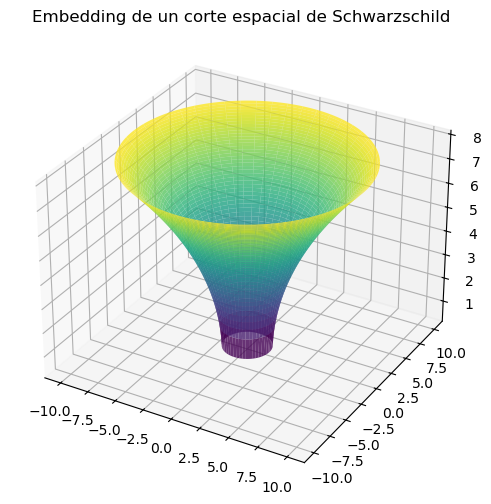

In [19]:
import numpy as np
import matplotlib.pyplot as plt

M = 1.0
r = np.linspace(2.01*M, 10*M, 1000)
z = 2 * np.sqrt(2*M*(r - 2*M))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

phi = np.linspace(0, 2*np.pi, 200)
R, PHI = np.meshgrid(r, phi)
Z = 2 * np.sqrt(2*M*(R - 2*M))
X = R * np.cos(PHI)
Y = R * np.sin(PHI)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('Embedding de un corte espacial de Schwarzschild')
plt.show()

------
# Parte 2: EinsteinPy

En esta parte, explorar los tutoriales disponibles en 

https://einsteinpy.org/